In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open("BikeRentalDaily_train.csv", "r",encoding="utf-8") as f:
    reader = pd.read_csv(f, delimiter=";")
    
    


In [22]:
sorted_df = reader.sort_values(by=['instant'])
index_df = sorted_df.set_index('instant')

for i in index_df['instant']:
    print(i)


KeyError: 'instant'

In [12]:
reader.describe() #column "Season" has missing data (538 Entrys of 600) &  "hum" (humidity also only has 566 Entrys)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,538.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,566.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.436803,0.496667,6.475000,0.03000,2.928333,0.680000,1.401667,19.808284,0.473620,93.845200,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.107240,0.500406,3.442741,0.17073,2.079360,0.466865,0.542360,7.206843,0.160439,21.380635,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,-1.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,77.328150,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,109.921913,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


In [13]:
# sorted Dataframe, sorted by instant, so that its in the right chronical order
df = pd.DataFrame(reader)
sorted_df = df.sort_values(by=['instant'])


index_df = sorted_df.set_index('instant')

index_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


In [14]:
# list of all missing values

index_df.isnull().sum()

dteday              0
season             62
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                34
windspeed           0
leaflets            0
price reduction     0
casual              0
registered          0
cnt                 0
dtype: int64

In [15]:
# total count of missing values
print(index_df.isnull().sum().sum(), 'values are missing')

96 values are missing


In [16]:
index_df.dropna()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
6,06.01.2011,1.0,0,1,0,4,1,1,8.1739,0.233209,77.73915,0.089565,734,1,88,1518,1606
8,08.01.2011,1.0,0,1,0,6,0,2,6.6000,0.162254,80.37495,0.266804,990,0,68,891,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


KeyError: ''

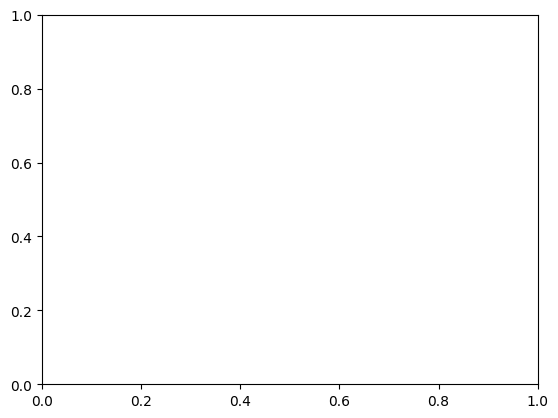

In [17]:
#scatterplot relation between temp and registered during the seasons  
scatter = index_df.plot.scatter(x='registered', y='', 
                        c='season',colormap='viridis',sharex=False)

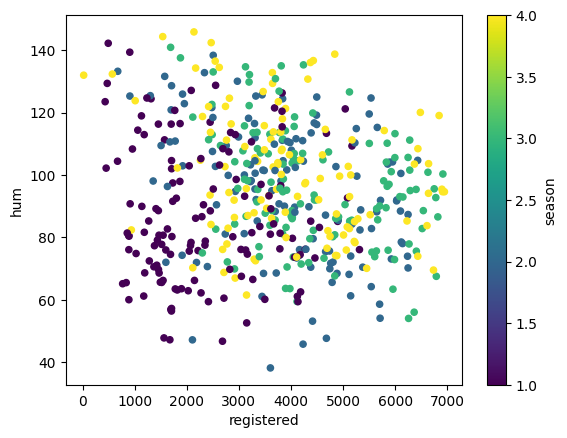

In [18]:
#scatterplot relation between humility and registered during through the seasons
scatter = index_df.plot.scatter(x='registered', y='hum', 
                        c='season',colormap='viridis',sharex=False)

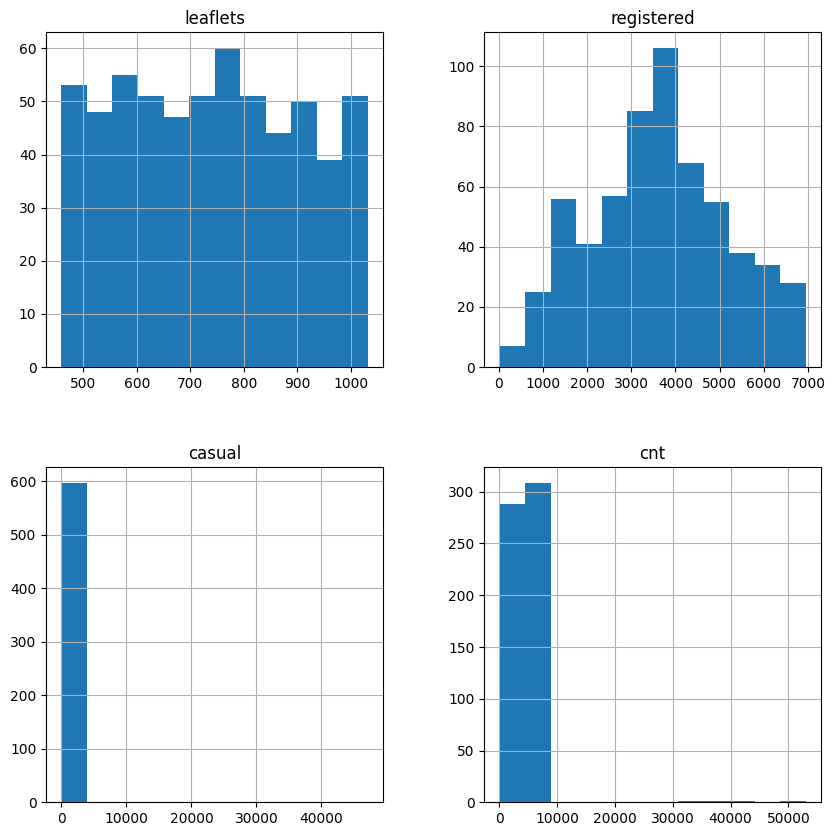

In [19]:
#histogramm of the leaflets, registered, casual users and total count
# something fishy with the hist of casual users and total count

hist = index_df[['leaflets', 'registered', 'casual', 'cnt']].hist(bins=12,figsize=(10, 10))

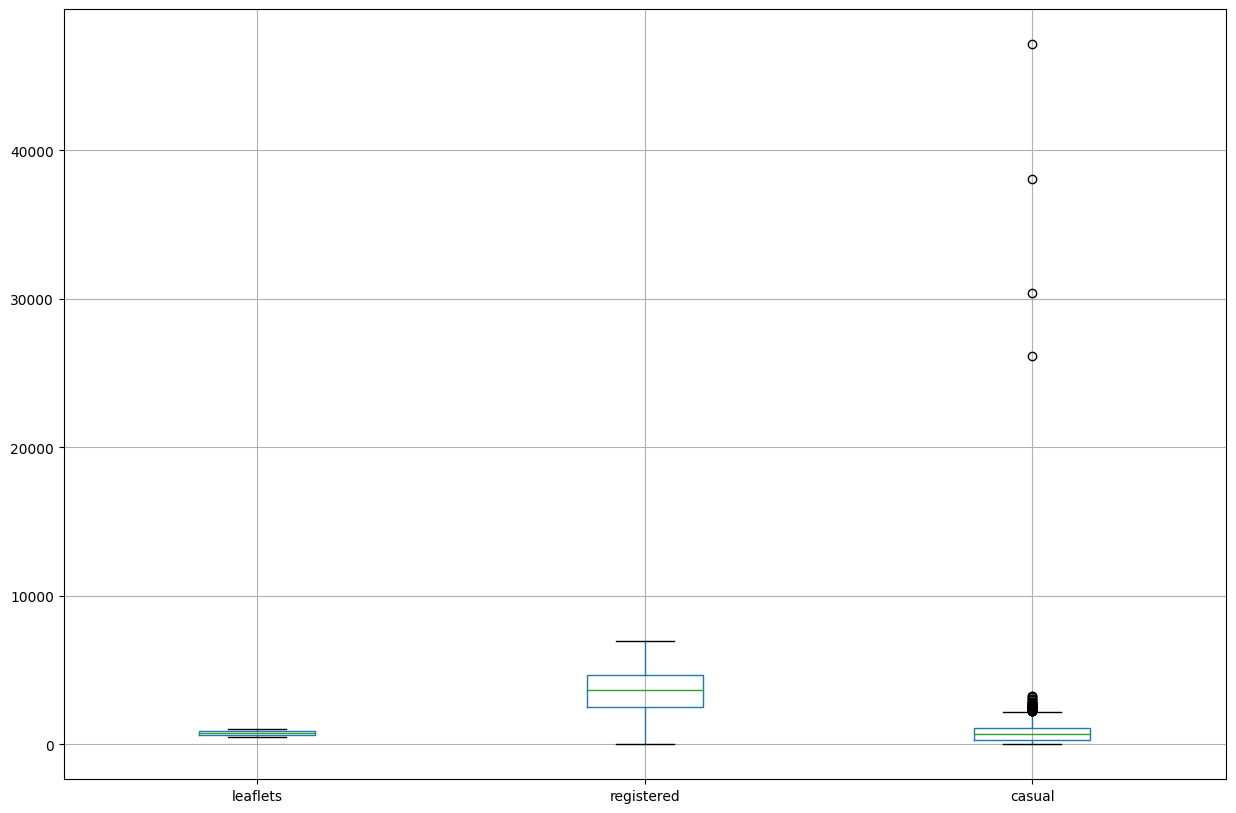

In [20]:
boxplot = index_df[['leaflets', 'registered', 'casual']].boxplot(figsize=(15, 10))